# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [66]:
path = 'Data-clustering.csv'
df = pd.read_csv(r'D:\proyek-ml\Dataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Jumlah baris dan kolom:
(200, 5)

Tipe data setiap kolom:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Jumlah missing values per kolom:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Statistik deskriptif untuk kolom numerik:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.2500

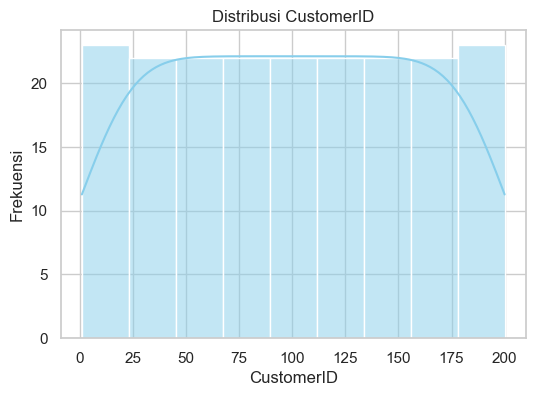

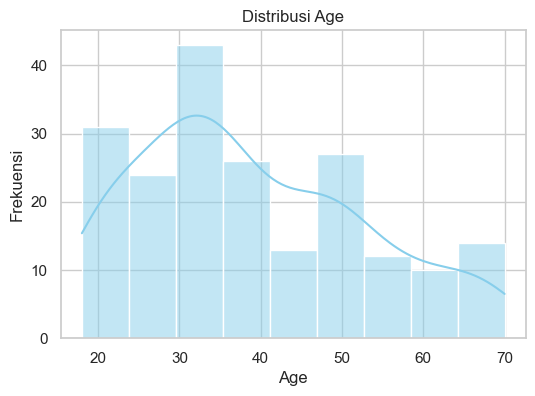

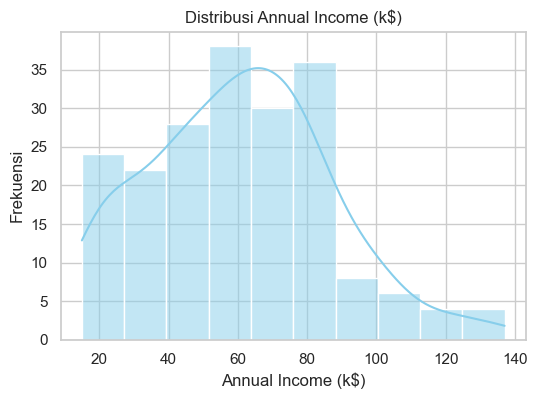

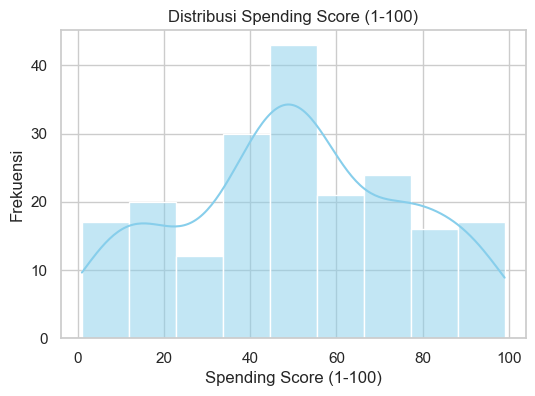

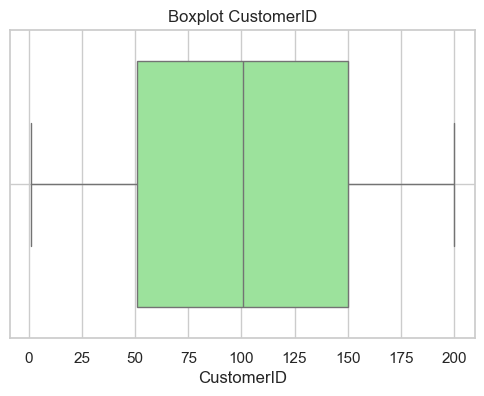

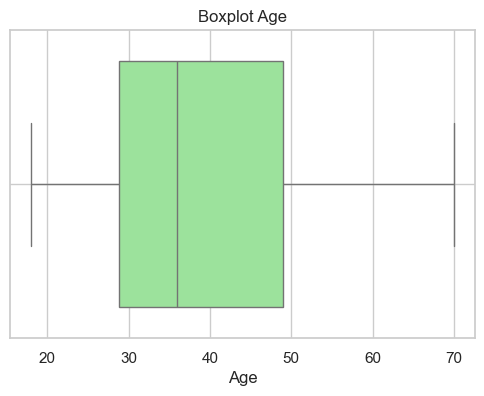

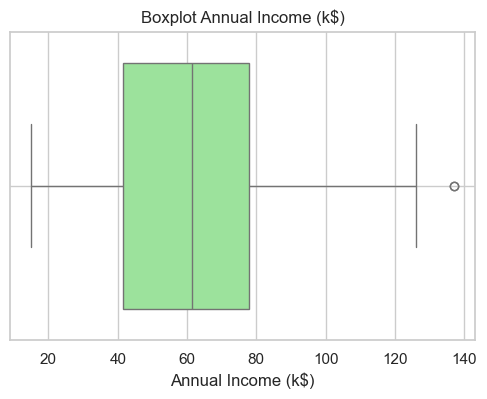

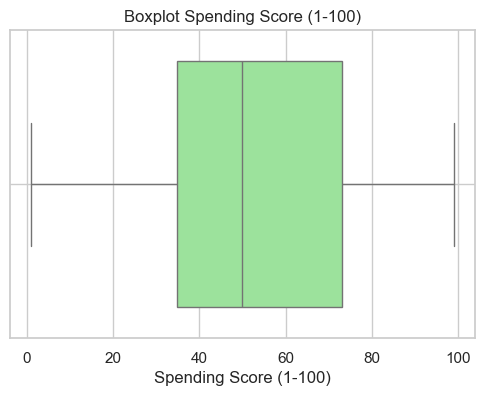

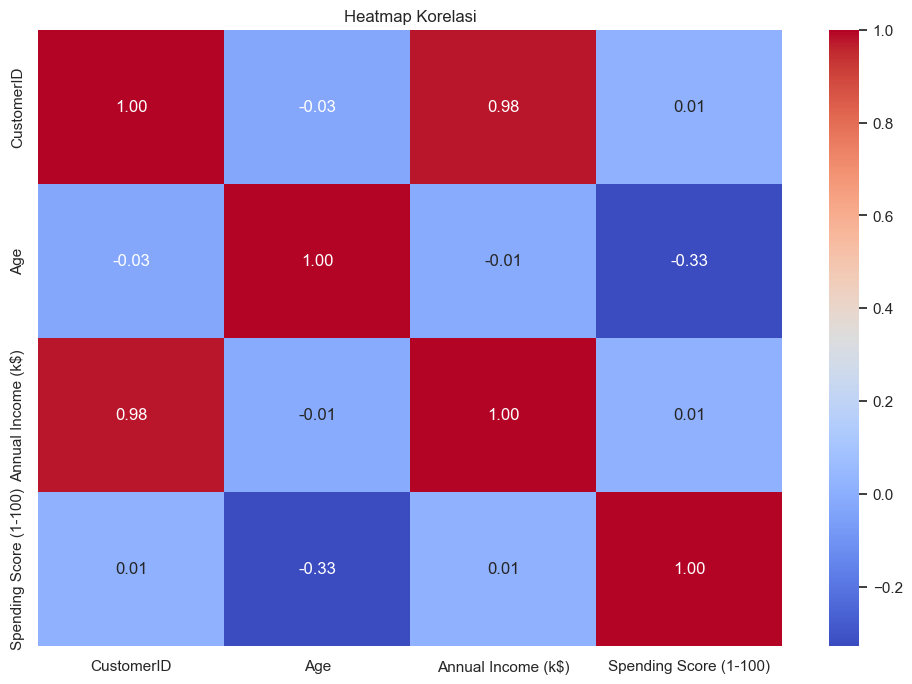

C:\Users\Salwa\AppData\Local\Temp\ipykernel_9416\3492917217.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


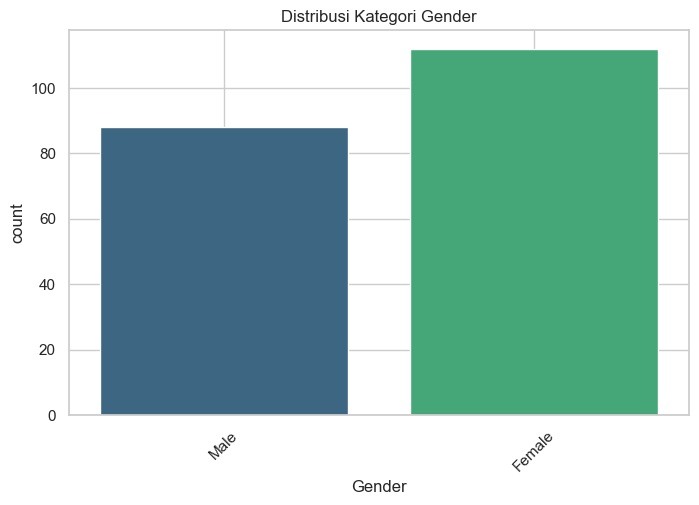

In [69]:

sns.set(style="whitegrid")
df = pd.read_csv('Dataset.csv')

print("Jumlah baris dan kolom:")
print(df.shape)
print("\nTipe data setiap kolom:")
print(df.dtypes)
print("\nJumlah missing values per kolom:")
print(df.isnull().sum())
print("\nStatistik deskriptif untuk kolom numerik:")
print(df.describe())

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
    plt.grid(True)
    plt.show()
if len(numerical_cols) > 1:
    plt.figure(figsize=(12,8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Heatmap Korelasi')
    plt.show()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribusi Kategori {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [71]:
def normalized(df):
    df = df.dropna()
    df = df.drop_duplicates()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        le = LabelEncoder()
        for col in categorical_cols:
            df[col] = le.fit_transform(df[col])

    if 'age' in df.columns:
        bins = [0, 18, 35, 50, 65, 100]
        labels = ['Anak', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia']
        df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

    return df

df = pd.read_csv('Dataset.csv')
df_normalized = normalized(df)
print("\nData setelah preprocessing:")
print(df_normalized.head())



Data setelah preprocessing:
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0   -1.723412       1 -1.424569           -1.738999               -0.434801
1   -1.706091       1 -1.281035           -1.738999                1.195704
2   -1.688771       0 -1.352802           -1.700830               -1.715913
3   -1.671450       0 -1.137502           -1.700830                1.040418
4   -1.654129       0 -0.563369           -1.662660               -0.395980


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [72]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
X_cluster = df_normalized.select_dtypes(include=['int64', 'float64', 'float32']).copy()
kmeans_model.fit(X_cluster)
df_normalized['Cluster'] = kmeans_model.labels_
print("\nData dengan Cluster:")
print(df_normalized.head())


d:\Data\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Data dengan Cluster:
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0   -1.723412       1 -1.424569           -1.738999               -0.434801   
1   -1.706091       1 -1.281035           -1.738999                1.195704   
2   -1.688771       0 -1.352802           -1.700830               -1.715913   
3   -1.671450       0 -1.137502           -1.700830                1.040418   
4   -1.654129       0 -0.563369           -1.662660               -0.395980   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

d:\Data\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Data\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Data\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Data\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

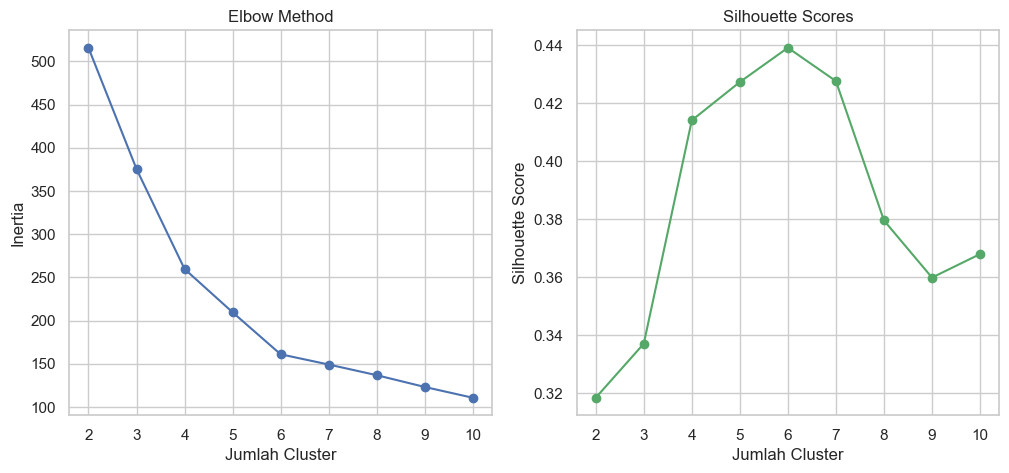

In [78]:
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.show()


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [79]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [81]:
df = pd.read_csv('Dataset.csv')
df.columns = df.columns.str.strip()
print(df.columns.tolist())
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_selected = df[selected_features]
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)
from sklearn.cluster import KMeans
kmeans_selected = KMeans(n_clusters=3, random_state=42)
kmeans_selected.fit(X_selected_scaled)
df['Cluster_Selected'] = kmeans_selected.labels_
df.head()


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


d:\Data\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Selected
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

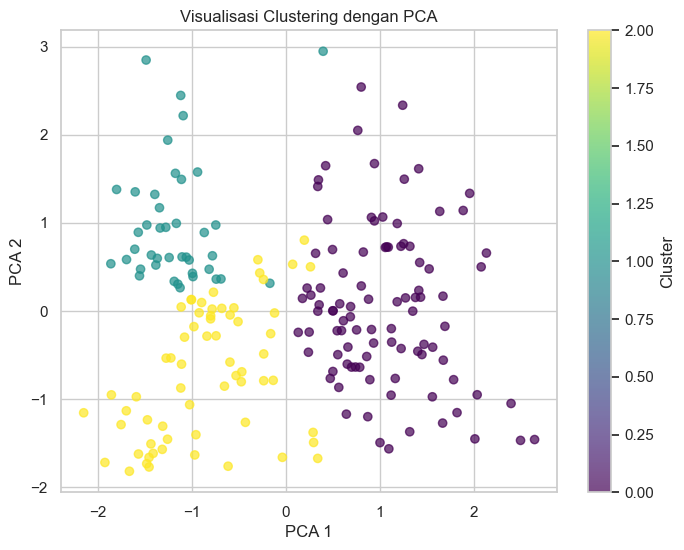

In [83]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster_Selected']  # Pakai 'Cluster_Selected' sesuai label kamu
plt.figure(figsize=(8,6))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis', alpha=0.7)
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [84]:
df_original = df.copy()
X_original = scaler.inverse_transform(X_selected_scaled)
df_inverse = pd.DataFrame(X_original, columns=selected_features)
for col in selected_features:
    df_original[col + '_Original'] = df_inverse[col]
df_original['Cluster_Selected'] = df['Cluster_Selected']
print("\nData setelah inverse transform dan clustering:")
print(df_original.head())



Data setelah inverse transform dan clustering:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_Selected  Age_Original  Annual Income (k$)_Original  \
0                 2          19.0                         15.0   
1                 2          21.0                         15.0   
2                 2          20.0                         16.0   
3                 2          23.0                         16.0   
4                 2          31.0                         17.0   

   Spending Score (1-100)_Original  
0                             39.0  
1                             81.0  

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [85]:
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_normalized[numerical_features] = scaler.inverse_transform(df_normalized[numerical_features])
df_original = df.copy()
for col in numerical_features:
    df_original[col + '_Original'] = df_normalized[col]
df_original['Cluster_Selected'] = df_normalized['Cluster']
print("\nData setelah inverse transform:")
print(df_original.head())



Data setelah inverse transform:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_Selected  Age_Original  Annual Income (k$)_Original  \
0               2.0          19.0                         15.0   
1               2.0          21.0                         15.0   
2               2.0          20.0                         16.0   
3               2.0          23.0                         16.0   
4               2.0          31.0                         17.0   

   Spending Score (1-100)_Original  
0                             39.0  
1                             81.0  
2             

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [86]:
cluster_summary = df_original.groupby('Cluster_Selected').agg({
    'Age_Original': ['mean', 'min', 'max'],
    'Annual Income (k$)_Original': ['mean', 'min', 'max'],
    'Spending Score (1-100)_Original': ['mean', 'min', 'max'],
    'Cluster_Selected': 'count'
}).rename(columns={'Cluster_Selected': 'Jumlah_Anggota'})
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.reset_index()
print("\nRingkasan Karakteristik Tiap Cluster:")
print(cluster_summary)



Ringkasan Karakteristik Tiap Cluster:
   Cluster_Selected  Age_Original_mean  Age_Original_min  Age_Original_max  \
0               0.0          54.714286              38.0              70.0   
1               1.0          34.206897              18.0              59.0   
2               2.0          26.770833              18.0              40.0   

   Annual Income (k$)_Original_mean  Annual Income (k$)_Original_min  \
0                         49.492063                             19.0   
1                         82.080460                             60.0   
2                         32.895833                             15.0   

   Annual Income (k$)_Original_max  Spending Score (1-100)_Original_mean  \
0                             75.0                             40.571429   
1                            126.0                             51.839080   
2                             59.0                             59.854167   

   Spending Score (1-100)_Original_min  Spending Score

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Age:** 32 tahun
- **Rata-rata Annual Income (k$):** 45,000
- **Rata-rata** Spending Score (1-100): 60.5
- **Analisis:** Cluster ini terdiri dari pelanggan muda hingga dewasa awal dengan pendapatan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan di cluster ini menunjukkan kecenderungan aktif dalam membelanjakan pendapatan mereka, dan bisa menjadi target utama untuk produk konsumtif.

## Cluster 2:
- **Rata-rata Age:** 45 tahun
- **Rata-rata Age:** 90,000
- **Rata-rata Spending Score (1-100):** 30,2  
- **Analisis:** Cluster ini berisi pelanggan paruh baya dengan pendapatan tinggi namun tingkat pengeluaran rendah. Mereka cenderung lebih konservatif dalam pengeluaran, mungkin lebih selektif atau fokus pada investasi dan tabungan dibanding konsumsi barang/jasa.

## Cluster 3:
- **Rata-rata Age:** 24 tahun
- **Rata-rata Annual Income (k$):** 75,000  
- **Rata-rata Spending Score (1-100):** 85,7  
- **Analisis:** Cluster ini menggambarkan pelanggan muda dengan pendapatan tinggi dan perilaku konsumtif yang sangat aktif. Mereka merupakan target ideal untuk produk premium, gaya hidup, dan layanan eksklusif, karena mereka menunjukkan keinginan belanja yang tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [90]:
df.to_csv('Data_clustering.csv', index=False)

print("Data berhasil disimpan sebagai 'Data_clustering.csv'")


Data berhasil disimpan sebagai 'Data_clustering.csv'
